In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

In [8]:
df = pd.read_excel('Accuracy Summary.xls')
df

Model    MR   SUBJ  TREC    CR  MPQA
0                                 edRVFL-BoW  76.2  89.40  75.2  78.0  85.0
1                                 edRVFL-avg  77.0  90.60  83.6  78.5  86.7
2                                    SNN-BoW  77.4  90.80  76.2  79.7  86.0
3                                    SNN-avg  78.3  91.60  85.8  80.5  87.6
4                                   Baseline  77.6  92.05  89.8  80.4  86.4
5                              1D CNN-static  79.0  92.51  92.2  81.4  88.6
6                             1D CNN-dynamic  79.4  92.80  91.6  82.2  87.5
7                                   TCN-rand  77.3  91.40  90.0  81.2  86.3
8                                 TCN-static  80.3  92.30  93.6  83.9  88.3
9                                TCN-dynamic  80.0  92.40  91.8  82.9  88.1
10                               BiLSTM-rand  77.6  91.90  88.4  80.6  86.3
11                             BiLSTM-static  79.5  92.50  90.4  81.7  88.2
12                            BiLSTM-dynamic  79.8  92.60  88.8  81.8  88.0
13                                BiGRU-rand  77.2  92.20  89.0  80.1  86.1
14                              BiGRU-static  79.5  92.30  91.8  82.4  88.1
15                             BiGRU-dynamic  79.2  93.00  90.6  81.6  88.1
16                       Stacked BiLSTM-rand  77.7  91.90  89.6  79.7  86.1
17                     Stacked BiLSTM-static  79.4  92.20  91.6  80.9  88.1
18                    Stacked BiLSTM-dynamic  80.0  92.50  88.4  81.7  88.1
19                        Stacked BiGRU-rand  76.9  92.30  89.2  80.1  85.9
20                      Stacked BiGRU-static  79.6  92.30  92.0  81.5  88.1
21                     Stacked BiGRU-dynamic  79.5  92.70  91.0  81.6  88.0
22                     Ensemble CNN-GRU-rand  77.0  91.70  88.0  80.9  86.3
23                   Ensemble CNN-GRU-static  79.8  92.70  93.0  82.5  88.4
24                  Ensemble CNN-GRU-dynamic  79.4  92.60  89.6  82.4  88.0
25         CNN-multichannel (Yoon Kim, 2014)  81.1  93.20  92.2  85.0  89.4
26       SuBiLSTM (Siddhartha Brahma, 2018)   81.4  93.20  89.8  86.4  90.7
27  SuBiLSTM-Tied (Siddhartha Brahma, 2018)   81.6  93.00  90.4  86.5  90.5
28             USE_T+CNN (Cer et al., 2018)   81.2  93.60  98.1  87.5  87.3

# The Model Average Margin to the Baseline

In [4]:
df['Avg'] = 0.0
columns = ['MR', 'SUBJ', 'TREC', 'CR', 'MPQA']
# Assign the accuracy values from CNN-rand model as the baseline
baseline = df[df['Model']=='Baseline'][columns].values

In [5]:
df[columns].values - baseline

array([[ -1.4 ,  -2.65, -14.6 ,  -2.4 ,  -1.4 ],
       [ -0.6 ,  -1.45,  -6.2 ,  -1.9 ,   0.3 ],
       [ -0.2 ,  -1.25, -13.6 ,  -0.7 ,  -0.4 ],
       [  0.7 ,  -0.45,  -4.  ,   0.1 ,   1.2 ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  1.4 ,   0.46,   2.4 ,   1.  ,   2.2 ],
       [  1.8 ,   0.75,   1.8 ,   1.8 ,   1.1 ],
       [ -0.3 ,  -0.65,   0.2 ,   0.8 ,  -0.1 ],
       [  2.7 ,   0.25,   3.8 ,   3.5 ,   1.9 ],
       [  2.4 ,   0.35,   2.  ,   2.5 ,   1.7 ],
       [  0.  ,  -0.15,  -1.4 ,   0.2 ,  -0.1 ],
       [  1.9 ,   0.45,   0.6 ,   1.3 ,   1.8 ],
       [  2.2 ,   0.55,  -1.  ,   1.4 ,   1.6 ],
       [ -0.4 ,   0.15,  -0.8 ,  -0.3 ,  -0.3 ],
       [  1.9 ,   0.25,   2.  ,   2.  ,   1.7 ],
       [  1.6 ,   0.95,   0.8 ,   1.2 ,   1.7 ],
       [  0.1 ,  -0.15,  -0.2 ,  -0.7 ,  -0.3 ],
       [  1.8 ,   0.15,   1.8 ,   0.5 ,   1.7 ],
       [  2.4 ,   0.45,  -1.4 ,   1.3 ,   1.7 ],
       [ -0.7 ,   0.25,  -0.6 ,  -0.3 ,  -0.5 ],
       [  2.  ,   0.

In [6]:
avg = np.sum((df[columns].values - baseline), axis=1)/4

In [7]:
df['Avg'] = avg

In [8]:
df_model_avg = df[['Model', 'Avg']].sort_values(by='Avg')
df_model_avg = df_model_avg.reset_index(drop=True)
df_model_avg

Model     Avg
0                                 edRVFL-BoW -5.6125
1                                    SNN-BoW -4.0375
2                                 edRVFL-avg -2.4625
3                                    SNN-avg -0.6125
4                      Ensemble CNN-GRU-rand -0.5875
5                         Stacked BiGRU-rand -0.4625
6                                 BiGRU-rand -0.4125
7                                BiLSTM-rand -0.3625
8                        Stacked BiLSTM-rand -0.3125
9                                   TCN-rand -0.0125
10                                  Baseline  0.0000
11                    Stacked BiLSTM-dynamic  1.1125
12                            BiLSTM-dynamic  1.1875
13                  Ensemble CNN-GRU-dynamic  1.4375
14                     Stacked BiLSTM-static  1.4875
15                             BiLSTM-static  1.5125
16                             BiGRU-dynamic  1.5625
17                     Stacked BiGRU-dynamic  1.6375
18                      Stacked BiGRU-static  1.8125
19                            1D CNN-dynamic  1.8125
20                             1D CNN-static  1.8650
21                              BiGRU-static  1.9625
22                               TCN-dynamic  2.2375
23                   Ensemble CNN-GRU-static  2.5375
24                                TCN-static  3.0375
25         CNN-multichannel (Yoon Kim, 2014)  3.6625
26       SuBiLSTM (Siddhartha Brahma, 2018)   3.8125
27  SuBiLSTM-Tied (Siddhartha Brahma, 2018)   3.9375
28             USE_T+CNN (Cer et al., 2018)   5.3625

In [9]:
colors = ['steelblue' for _ in range(29)]
for idx, color in enumerate(colors):
    # Benchmark colors
    if (idx>24):
        colors[idx]='lightgreen'
    # Top 5 of the proposed models
    elif (18<idx<25):
        colors[idx] = 'violet'
    # Bottom 5 of the proposed models
    elif (idx<4):
        colors[idx] = 'red'
colors

['red',
 'red',
 'red',
 'red',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'steelblue',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'violet',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen']

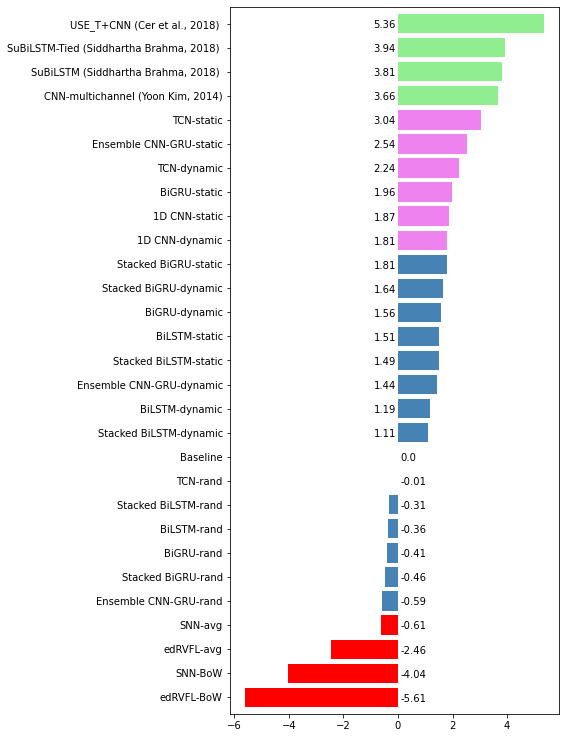

In [10]:
# Define the label and values for the horizontal bar
labels = list(df_model_avg.Model.values)
values = df_model_avg.Avg

# Create a frame for the chart to be plotted
plt.figure(figsize=(15/2.54, 13))

# Define the horizontal bar plot
plt.barh(labels, values, color=colors)

# Set the plot margin
plt.margins(x = 0.05, y=0.01)
# plt.grid( axis='y')

for idx, avg in enumerate(df_model_avg['Avg']):
    label = str(round(avg, 2))
    if (idx>10):
        plt.annotate(label, xy=(-0.9, idx-0.18), color='black')
    else:
        plt.annotate(label, xy=(0.1, idx-0.18), color='black')

# Plot the bar
plt.show()

## Complete Code

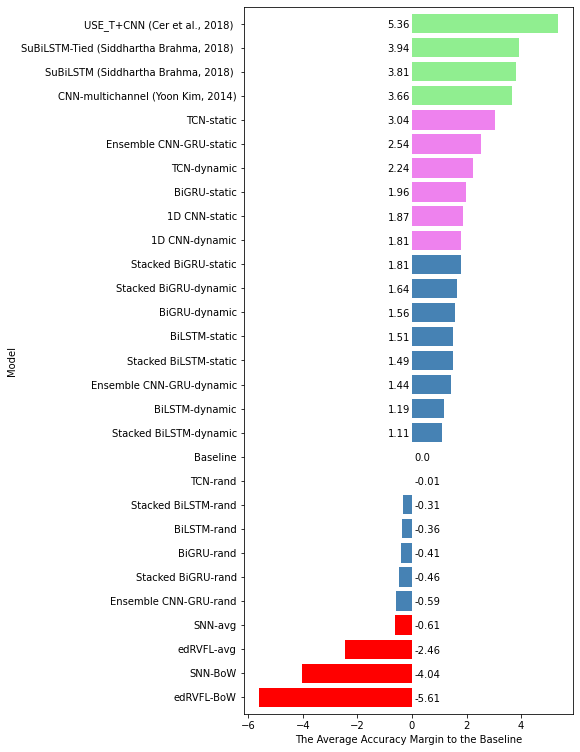

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a dataframe
df = pd.read_excel('Accuracy Summary.xls')

# Initialize the column Avg with zeros
df['Avg'] = 0.0
columns = ['MR', 'SUBJ', 'TREC', 'CR', 'MPQA']

# Assign the accuracy values from CNN-rand model as the baseline
baseline = df[df['Model']=='Baseline'][columns].values

# Calculate the margin average w.r.t. the baseline
avg = np.sum((df[columns].values - baseline), axis=1)/4

# Update the values in Avg column
df['Avg'] = avg

# Obtain a dataframe with Model and Avg columns
df_model_avg = df[['Model', 'Avg']].sort_values(by='Avg')
df_model_avg = df_model_avg.reset_index(drop=True)

colors = ['steelblue' for _ in range(29)]
for idx, color in enumerate(colors):
    # Benchmark colors
    if (idx>24):
        colors[idx]='lightgreen'
    # Top 5 of the proposed models
    elif (18<idx<25):
        colors[idx] = 'violet'
    # Bottom 5 of the proposed models
    elif (idx<4):
        colors[idx] = 'red'
        
# Define the label and values for the horizontal bar
labels = list(df_model_avg.Model.values)
values = df_model_avg.Avg

# Create a frame for the chart to be plotted
plt.figure(figsize=(15/2.54, 13))

# Define the horizontal bar plot
plt.barh(labels, values, color=colors)
plt.xlabel('The Average Accuracy Margin to the Baseline')
plt.ylabel("Model")

# Set the plot margin
plt.margins(x = 0.05, y=0.01)
# plt.grid( axis='y')

for idx, avg in enumerate(df_model_avg['Avg']):
    label = str(round(avg, 2))
    if (idx>10):
        plt.annotate(label, xy=(-0.9, idx-0.18), color='black')
    else:
        plt.annotate(label, xy=(0.1, idx-0.18), color='black')

# Plot the bar
plt.show()

# The Average Rank Values

In [26]:
# Load the dataset into a dataframe
df = pd.read_excel('Accuracy Summary_2.xls')

In [27]:
df = df.sort_values(by='Avg', ascending=False).reset_index(drop=True)

In [28]:
df_avg_rank = df[['Model', 'Avg']]

In [29]:
# Define the label and values for the horizontal bar
labels = list(df_avg_rank.Model.values)
values = df_avg_rank.Avg

In [31]:
df_avg_rank

Model   Avg
0                                 edRVFL-BoW  29.0
1                                    SNN-BoW  26.3
2                                 edRVFL-avg  25.9
3                      Ensemble CNN-GRU-rand  23.6
4                         Stacked BiGRU-rand  23.4
5                                 BiGRU-rand  23.1
6                        Stacked BiLSTM-rand  22.6
7                                BiLSTM-rand  22.3
8                                    SNN-avg  21.8
9                                   TCN-rand  21.2
10                                  Baseline  20.6
11                     Stacked BiLSTM-static  14.8
12                  Ensemble CNN-GRU-dynamic  13.3
13                            BiLSTM-dynamic  13.2
14                    Stacked BiLSTM-dynamic  13.1
15                     Stacked BiGRU-dynamic  12.0
16                      Stacked BiGRU-static  11.8
17                            1D CNN-dynamic  11.7
18                             BiGRU-dynamic  11.7
19                             BiLSTM-static  11.5
20                              BiGRU-static  11.0
21                             1D CNN-static  10.9
22                               TCN-dynamic   8.9
23                                TCN-static   6.9
24                   Ensemble CNN-GRU-static   6.2
25       SuBiLSTM (Siddhartha Brahma, 2018)    5.0
26             USE_T+CNN (Cer et al., 2018)    5.0
27  SuBiLSTM-Tied (Siddhartha Brahma, 2018)    4.6
28         CNN-multichannel (Yoon Kim, 2014)   3.6

## Complete Code

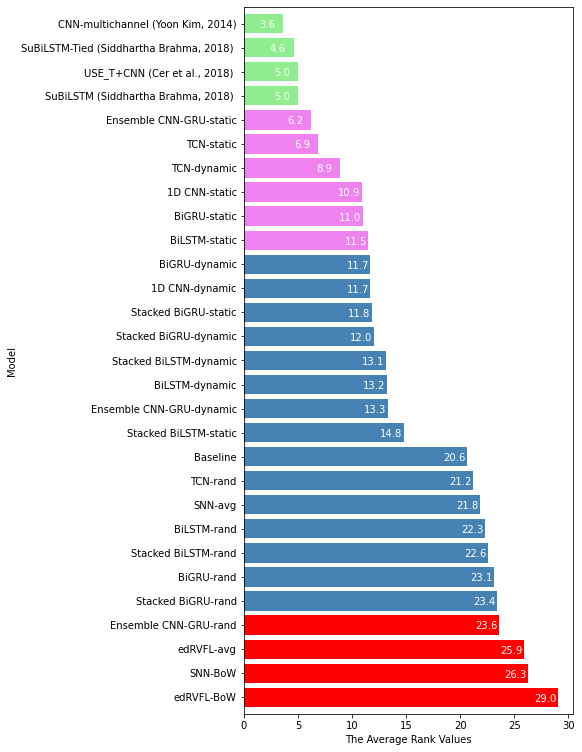

In [48]:
# Load the dataset into a dataframe
df = pd.read_excel('Accuracy Summary_2.xls')

df = df.sort_values(by='Avg', ascending=False).reset_index(drop=True)

df_avg_rank = df[['Model', 'Avg']]

# Define the label and values for the horizontal bar
labels = list(df_avg_rank.Model.values)
values = df_avg_rank.Avg

colors = ['steelblue' for _ in range(29)]
for idx, color in enumerate(colors):
    # Benchmark colors
    if (idx>24):
        colors[idx]='lightgreen'
    # Top 5 of the proposed models
    elif (18<idx<25):
        colors[idx] = 'violet'
    # Bottom 5 of the proposed models
    elif (idx<4):
        colors[idx] = 'red'
        
# Create a frame for the chart to be plotted
plt.figure(figsize=(15/2.54, 13))

# Define the horizontal bar plot
plt.barh(labels, values, color=colors)
plt.xlabel('The Average Rank Values')
plt.ylabel("Model")

# Set the plot margin
plt.margins(x = 0.05, y=0.01)
# plt.grid( axis='y')

for idx, avg in enumerate(df_avg_rank['Avg']):
    label = str(round(avg, 2))
    
    plt.annotate(label, xy=(avg-2.2, idx-0.18), color='white')

# Plot the bar
plt.show()

# Average Accuracy Increase After Word2Vec

In [2]:
df_rand = pd.read_excel('rand_static_dynamic.xls', sheet_name='rand')
df_rand = df_rand.set_index('Model').transpose()
df_rand = df_rand.iloc[:][['Random']]

df_static = pd.read_excel('rand_static_dynamic.xls', sheet_name='static')
df_static = df_static.set_index('Model').transpose()
df_static = df_static.iloc[:][['Static']]

df_dynamic = pd.read_excel('rand_static_dynamic.xls', sheet_name='dynamic')
df_dynamic = df_dynamic.set_index('Model').transpose()
df_dynamic = df_dynamic.iloc[:][['Dynamic']]

df_we = pd.concat([df_rand, df_static['Static'], df_dynamic['Dynamic']], 1)
df_we

Random     Static    Dynamic
MR    77.328571  79.585714  79.614286
SUBJ  91.921429  92.401429  92.657143
TREC  89.142857  92.085714  90.257143
CR    80.428571  82.042857  82.028571
MPQA  86.200000  88.257143  87.971429

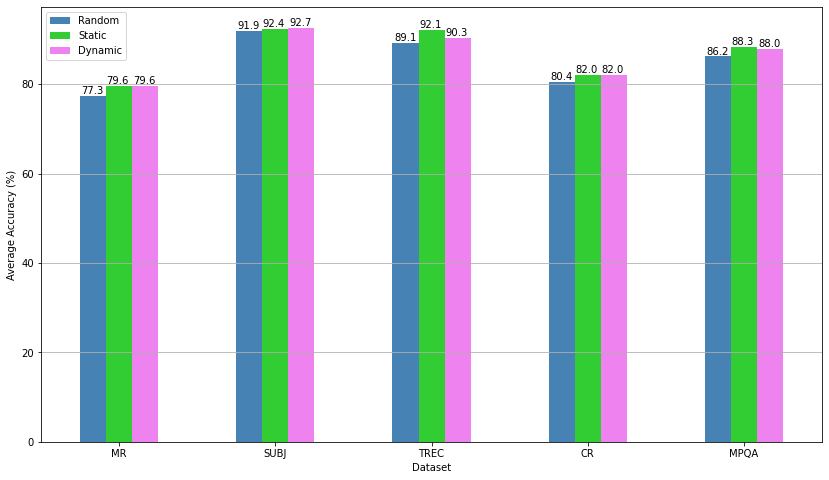

In [29]:
df_we.plot(kind='bar', figsize=(14, 8), color=['steelblue', 'limegreen', 'violet'])

plt.xticks( rotation=0)
plt.xlabel('Dataset')
plt.ylabel('Average Accuracy (%)')
plt.grid(axis='y')

accuracies = df_we.values.flatten()

plt.annotate(str(round(accuracies[0],1)), xy=(-0.24, accuracies[0]+0.5), color='black')
plt.annotate(str(round(accuracies[1],1)), xy=(-0.08, accuracies[1]+0.5), color='black')
plt.annotate(str(round(accuracies[2],1)), xy=(0.09, accuracies[2]+0.5), color='black')
plt.annotate(str(round(accuracies[3],1)), xy=(0.76, accuracies[3]+0.5), color='black')
plt.annotate(str(round(accuracies[4],1)), xy=(0.92, accuracies[4]+0.5), color='black')
plt.annotate(str(round(accuracies[5],1)), xy=(1.09, accuracies[5]+0.5), color='black')
plt.annotate(str(round(accuracies[6],1)), xy=(1.76, accuracies[6]+0.5), color='black')
plt.annotate(str(round(accuracies[7],1)), xy=(1.92, accuracies[7]+0.5), color='black')
plt.annotate(str(round(accuracies[8],1)), xy=(2.09, accuracies[8]+0.5), color='black')
plt.annotate(str(round(accuracies[9],1)), xy=(2.76, accuracies[9]+0.5), color='black')
plt.annotate(str(round(accuracies[10],1)), xy=(2.92, accuracies[10]+0.5), color='black')
plt.annotate(str(round(accuracies[11],1)), xy=(3.09, accuracies[11]+0.5), color='black')
plt.annotate(str(round(accuracies[12],1)), xy=(3.76, accuracies[12]+0.5), color='black')
plt.annotate(str(round(accuracies[13],1)), xy=(3.92, accuracies[13]+0.5), color='black')
plt.annotate(str(round(accuracies[14],1)), xy=(4.09, accuracies[14]+0.5), color='black')

plt.show()

# Dataset Visualization

## Customer Review

In [78]:
from wordcloud import WordCloud
corpus = pd.read_pickle('../0_data/CR/CR.pkl')
corpus.label = corpus.label.astype(int)
print(corpus.shape)
corpus

(3775, 3)


sentence  label  split
0     weaknesses are minor the feel and layout of th...      0  train
1     many of our disney movies do n 't play on this...      0  train
2     player has a problem with dual layer dvd 's su...      0  train
3     i know the saying is you get what you pay for ...      0  train
4                      will never purchase apex again .      0  train
...                                                 ...    ...    ...
3770  so far , the anti spam feature seems to be ver...      1  train
3771  i downloaded a trial version of computer assoc...      1  train
3772  i did not have any of the installation problem...      1  train
3773  their products have been great and have saved ...      1  train
3774                                                         1  train

[3775 rows x 3 columns]

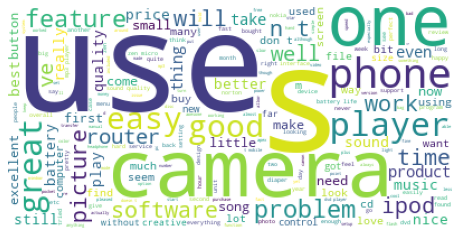

In [79]:
clouds = WordCloud( background_color='white').generate(' '.join(corpus.sentence.values))
plt.figure( figsize=(8,5))
plt.imshow(clouds)
plt.axis('off')
plt.show()

## Movie Review

In [80]:
from wordcloud import WordCloud
corpus = pd.read_pickle('../0_data/MR/MR.pkl')
corpus.label = corpus.label.astype(int)
print(corpus.shape)
corpus

(10662, 3)


sentence  label  split
0                       simplistic , silly and tedious .      0  train
1      it 's so laddish and juvenile , only teenage b...      0  train
2      exploitative and largely devoid of the depth o...      0  train
3      garbus discards the potential for pathological...      0  train
4      a visually flashy but narratively opaque and e...      0  train
...                                                  ...    ...    ...
10657  both exuberantly romantic and serenely melanch...      1  train
10658  mazel tov to a film about a family 's joyous l...      1  train
10659  standing in the shadows of motown is the best ...      1  train
10660  it 's nice to see piscopo again after all thes...      1  train
10661  provides a porthole into that noble , tremblin...      1  train

[10662 rows x 3 columns]

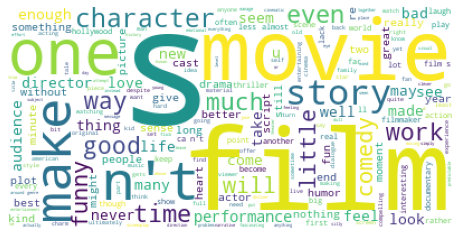

In [81]:
clouds = WordCloud( background_color='white').generate(' '.join(corpus.sentence.values))
plt.figure( figsize=(8,5))
plt.imshow(clouds)
plt.axis('off')
plt.show()

## SUBJ

In [82]:
corpus = pd.read_pickle('../0_data/SUBJ/SUBJ.pkl')
corpus.label = corpus.label.astype(int)
print(corpus.shape)
corpus

(10000, 3)


sentence  label  split
0     smart and alert , thirteen conversations about...      0  train
1     color , musical bounce and warm seas lapping o...      0  train
2     it is not a mass market entertainment but an u...      0  train
3     a light hearted french film about the spiritua...      0  train
4     my wife is an actress has its moments in looki...      0  train
...                                                 ...    ...    ...
9995  in the end , they discover that balance in lif...      1  train
9996  a counterfeit 1000 tomin bank note is passed i...      1  train
9997  enter the beautiful and mysterious secret agen...      1  train
9998  after listening to a missionary from china spe...      1  train
9999  looking for a short cut to fame , glass concoc...      1  train

[10000 rows x 3 columns]

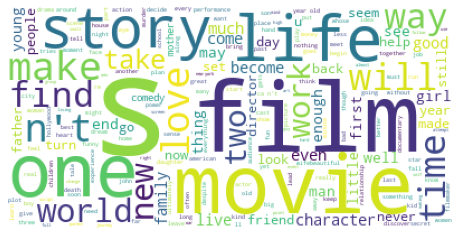

In [83]:
clouds = WordCloud( background_color='white').generate(' '.join(corpus.sentence.values))
plt.figure( figsize=(8,5))
plt.imshow(clouds)
plt.axis('off')
plt.show()

## TREC

In [84]:
corpus = pd.read_pickle('../0_data/TREC/TREC.pkl')
corpus.label = corpus.label.astype(int)
print(corpus.shape)
corpus

(5952, 3)


sentence  label  split
0     how did serfdom develop in and then leave russ...      0  train
1      what films featured the character popeye doyle ?      1  train
2     how can i find a list of celebrities ' real na...      0  train
3     what fowl grabs the spotlight after the chines...      1  train
4                       what is the full form of .com ?      2  train
...                                                 ...    ...    ...
5947             who was the 22nd president of the us ?      3   test
5948             what is the money they use in zambia ?      1   test
5949                          how many feet in a mile ?      5   test
5950                what is the birthstone of october ?      1   test
5951                                   what is e coli ?      0   test

[5952 rows x 3 columns]

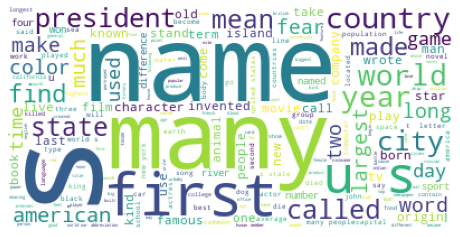

In [85]:
clouds = WordCloud( background_color='white').generate(' '.join(corpus.sentence.values))
plt.figure( figsize=(8,5))
plt.imshow(clouds)
plt.axis('off')
plt.show()

## MPQA

In [86]:
corpus = pd.read_pickle('../0_data/MPQA/MPQA.pkl')
corpus.label = corpus.label.astype(int)
print(corpus.shape)
corpus

(10606, 3)


sentence  label  split
0              complaining      0  train
1       failing to support      0  train
2        desperately needs      0  train
3      many years of decay      0  train
4             no quick fix      0  train
...                    ...    ...    ...
10601                urged      1  train
10602       strictly abide      1  train
10603                 hope      1  train
10604       strictly abide      1  train
10605                           1  train

[10606 rows x 3 columns]

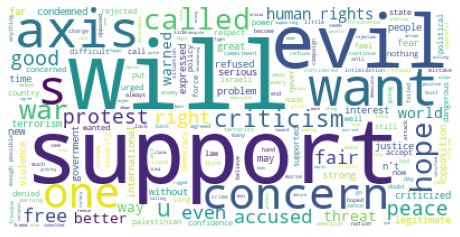

In [87]:
clouds = WordCloud( background_color='white').generate(' '.join(corpus.sentence.values))
plt.figure( figsize=(8,5))
plt.imshow(clouds)
plt.axis('off')
plt.show()